## Basics: stochastic (Markov) matrix and doubly stochastic matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### A left stochastic matrix

$$M = \begin{bmatrix}
0.9 & 0.3 \\
0.1 & 0.7 \\
\end{bmatrix}$$

In [7]:
from counterfusion import interaction_builder
# M = np.array([[0.9,0.3],[0.1,0.7]])
M = interaction_builder(2,0,1,[0.1,0.3])
print("A left stochastic matrix:")
print(M)

A left stochastic matrix:
[[0.9 0.3]
 [0.1 0.7]]


In [10]:
from counterfusion import generate_bynumber,interaction_builder
seq = generate_bynumber([[1,2,[0.1,0.3],1],[1,3,[0.3,0.6],1],[0,3,[0.3,0.9],1]])
dim = 4
print("A sequence of left stochastic matrices")
for id1, id2, v in zip(seq[:, 0], seq[:, 1], seq[:, 2]):
    matrix = interaction_builder(dimension=dim, id1=id1, id2=id2, value=v)
    print("----------------------------")
    print(matrix)

A sequence of left stochastic matrices
----------------------------
[[1.  0.  0.  0. ]
 [0.  0.7 0.  0.6]
 [0.  0.  1.  0. ]
 [0.  0.3 0.  0.4]]
----------------------------
[[1.  0.  0.  0. ]
 [0.  0.9 0.3 0. ]
 [0.  0.1 0.7 0. ]
 [0.  0.  0.  1. ]]
----------------------------
[[0.7 0.  0.  0.9]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.3 0.  0.  0.1]]


#### Muliplied by itself 10 times

In [13]:
np.linalg.matrix_power(M,10)

array([[0.75151165, 0.74546504],
       [0.24848835, 0.25453496]])

#### 100 times!

In [14]:
np.linalg.matrix_power(M,100)

array([[0.75, 0.75],
       [0.25, 0.25]])

#### How does the muliplication evolve.

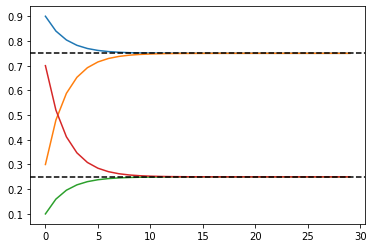

In [23]:
matrices = []
num = 30
for i in range(num):
    matrices.append(np.linalg.matrix_power(M,i+1))
plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices])
plt.axhline(y=0.75,linestyle='--',c='k')
plt.axhline(y=0.25,linestyle='--',c='k')

#### Plot the matrix as vectors

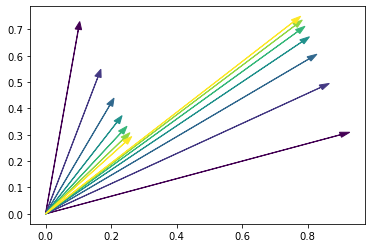

In [36]:
num_toplot = 7
colors=cm.viridis(np.linspace(0,1,num_toplot))
[plt.arrow(0,0,mat[0,0],mat[0,1],head_width=0.02,color=c) for mat,c in zip(matrices[:num_toplot],colors)]
[plt.arrow(0,0,mat[1,0],mat[1,1],head_width=0.02,color=c) for mat,c in zip(matrices[:num_toplot],colors)]

#### We define a doubly stochastic matrix

$$
M = \begin{bmatrix}
1-\beta/2 & \beta/2 \\
\beta/2 & 1-\beta/2 \\
\end{bmatrix}$$

In [15]:
from counterfusion import interaction_builder
beta = 0.1
Mbeta = interaction_builder(2,0,1,beta)
print("A doubly stochastic matrix:")
print(Mbeta)

A doubly stochastic matrix:
[[0.95 0.05]
 [0.05 0.95]]


In [9]:
from counterfusion import generate_bynumber,interaction_builder
seq = generate_bynumber([[1,2,0.7,1],[1,3,0.6,1],[0,3,0.9,1]])
dim = 4
print("A sequence of doubly stochastic matrices")
for id1, id2, v in zip(seq[:, 0], seq[:, 1], seq[:, 2]):
    matrix = interaction_builder(dimension=dim, id1=id1, id2=id2, value=v)
    print("----------------------------")
    print(matrix)

A sequence of doubly stochastic matrices
----------------------------
[[1.  0.  0.  0. ]
 [0.  0.7 0.  0.3]
 [0.  0.  1.  0. ]
 [0.  0.3 0.  0.7]]
----------------------------
[[1.   0.   0.   0.  ]
 [0.   0.65 0.35 0.  ]
 [0.   0.35 0.65 0.  ]
 [0.   0.   0.   1.  ]]
----------------------------
[[0.55 0.   0.   0.45]
 [0.   1.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.45 0.   0.   0.55]]


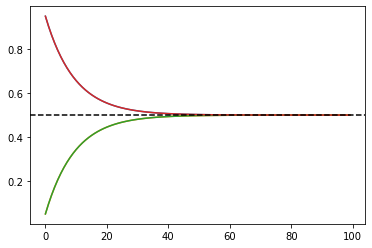

In [56]:
matrices = []
num = 100
for i in range(num):
    matrices.append(np.linalg.matrix_power(Mbeta,i+1))
plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices])
plt.axhline(y=0.5,linestyle='--',c='k')

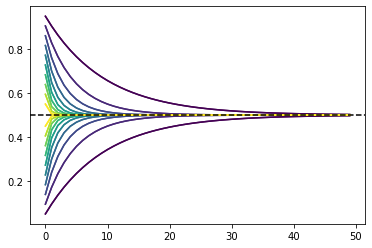

In [58]:
colors=cm.viridis(np.linspace(0,1,10))
for i, beta in enumerate(np.linspace(0.1,0.9,10)):
    color=colors[i]
    Mbeta = np.array([[1-beta/2,beta/2],[beta/2,1-beta/2]])
    matrices = []
    num = 50
    for i in range(num):
        matrices.append(np.linalg.matrix_power(Mbeta,i+1))
    plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices],color=color)
plt.axhline(y=0.5,linestyle='--',c='k')

## How to build your own model

/home/lx/gitproj/Counterfusion/counterfusion.py:75: UserWarning: Your matrix is singular. `np.linalg.lstsq` is used to find an approximate solution.
  warnings.warn("Your matrix is singular. `np.linalg.lstsq` is used to find an approximate solution.")


array([[<AxesSubplot:ylabel='Value'>, <AxesSubplot:ylabel='Value'>],
       [<AxesSubplot:xlabel='Interaction Site', ylabel='Flow Status'>,
        <AxesSubplot:xlabel='Interaction Site', ylabel='Flow Status'>]],
      dtype=object)

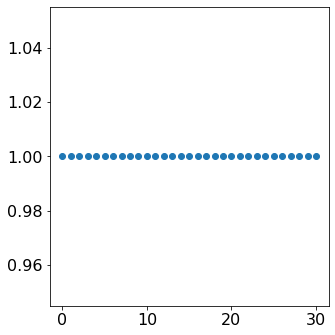

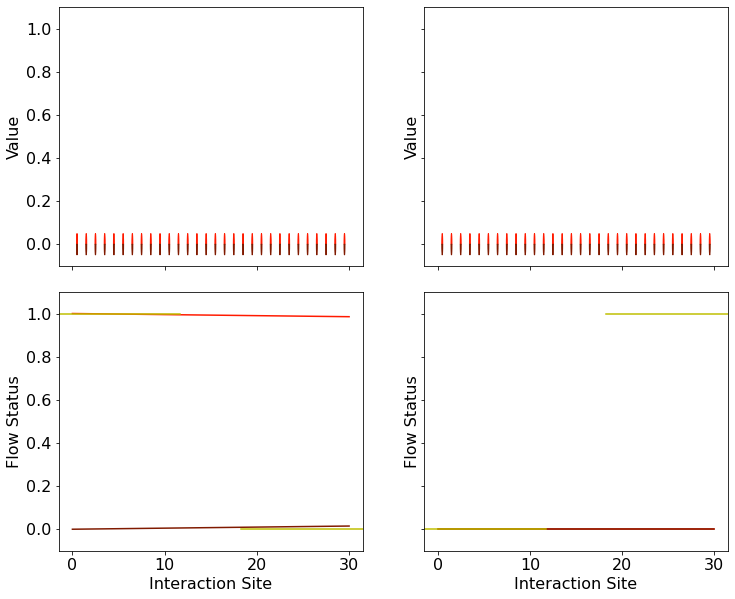

In [33]:
# Define a two-terminal system
# C1--M1--C2--M2--C1
# Total number of edge states: 2
# Number of forward-moving edge states: 1 (#0)
# Number of backward-moving edge states: 1 (#1)
#===============================================================
# General information for the system - Hyperparameters
totalNumMover = 2
numForwardMover = 2
zeroVoltTerminal = 1
blockStates = [[0,[1]]]
#===============================================================
# Information of scattering events 
# Interaction parameters
v01 = 0.001
g2t = []
# varying the length of device (number of interaction site)
for num_sites in np.arange(0,31,1): 
    # Define interaction between nodes (contacts)
    # C1--M1--C2
    edgeDef1 = [[0,1,v01,num_sites]]
    # C2--M2--C3
    edgeDef2 = [[0,1,v01,num_sites]]
    #================================================================
    edgesDef = [edgeDef1,edgeDef2]
    edgesInfo = []
    for edgeDef in edgesDef:
        edgesInfo.append(generate_bynumber(edgeDef))
    graph = []
    for edgeInfo in edgesInfo:
        graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))
    nodesCurrent = [1,-1]
    sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal,blockStates)
    volt = sys.solve()
    g2t.append(1/volt[0])
plt.figure(figsize=(5,5.5))
plt.scatter(np.arange(0,31,1),g2t,label='Simulation')
# plt.plot(np.arange(0,31,1),[1/(0.5+0.056*x) for x in np.arange(0,31,1)],c='c',label='$1/L$-decay')
# plt.legend(loc='upper right')
# plt.xlabel('Device length (L)')
# plt.ylabel('$G_{2t}$ [e$^2$/h]')
# plt.tight_layout()
# plt.savefig("g2t_counter.png")
sys.plot()

#### Build your first Edge and visualize it.

First five scattering events:
[[0.  3.  0.3]
 [0.  1.  0.5]
 [0.  3.  0.3]
 [0.  3.  0.3]
 [0.  1.  0.5]]
The transition matrix:
[[0.22859514 0.30848134 0.17539029 0.28753323]
 [0.27648548 0.37423609 0.15992745 0.18935098]
 [0.10364541 0.13819685 0.42425901 0.33389873]
 [0.39127397 0.17908572 0.24042325 0.18921706]]
Visualize the entire edge:


The file data_edge.json already exists. Do you want to overwrite it? (yes/no):  yes


Data written to data_edge.json


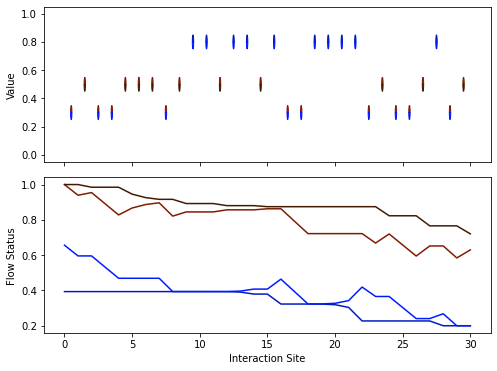

In [ ]:
from counterfusion import *
import numpy as np
import matplotlib.pyplot as plt
#===============================================================
# General information for the edge - Hyperparameters
totalNumMover = 4
numForwardMover = 2
initStates = [1,1,0.2,0.2]
#===============================================================
# Information of scattering events 
# Interaction parameters
v03 = 0.3
v01 = 0.5
v23 = 0.8
edgeDef = [[0,3,v03,10],[0,1,v01,10],[2,3,v23,10]]
edgeInfo = generate_bynumber(edgeDef)
edge = Edge(edgeInfo,totalNumMover,numForwardMover)
print("====================================================================")
print("First five scattering events:")
print(edge.get_seq()[:5])
print("====================================================================")
print("The transition matrix:")
print(edge.trans_mat())
print("====================================================================")
print("Visualize the entire edge:")
ax1,ax2 = edge.plot(initStates)
edge.output_to_json()

#### Build  $\nu=+2$ Quantum Hall system

The transition matrix between C1 and C2:
[[9.99500225e-01 4.99775060e-04]
 [4.99775060e-04 9.99500225e-01]]
Corresponding matrix for this system:
[[ 2. -0.  0.  0.  0. -2.]
 [-2.  2. -0.  0.  0.  0.]
 [ 0. -2.  2. -0.  0.  0.]
 [ 0.  0. -2.  2. -0.  0.]
 [ 0.  0.  0. -2.  2. -0.]
 [-0.  0.  0.  0. -2.  2.]]
Its determinant is 8.526512829121163e-14
Its solutions for all terminal voltages:
[5.00000000e-01 5.00000000e-01 5.00000000e-01 0.00000000e+00
 8.32667268e-17 1.38777878e-16]


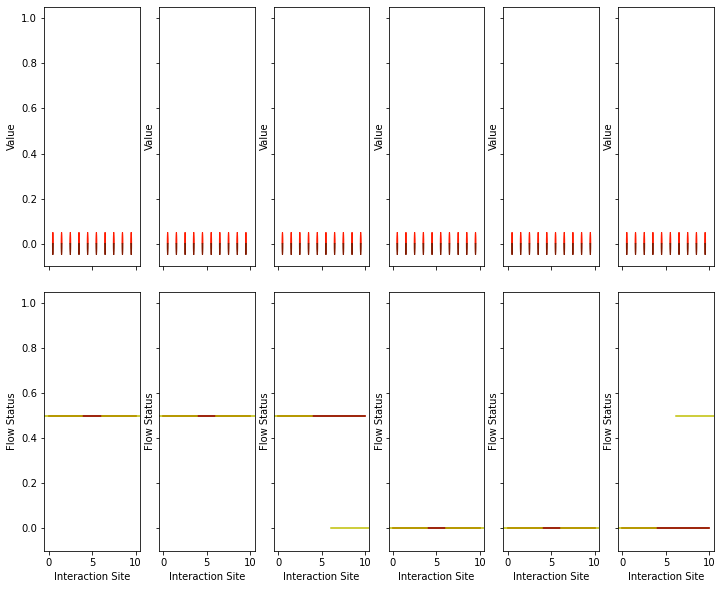

In [3]:
from counterfusion import *
import numpy as np
import matplotlib.pyplot as plt

# Define a six-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C5--M5--C6--M6--C1
# Total number of edge states: 2
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 0
#===============================================================
# General information for the system - Hyperparameters
totalNumMover = 2
numForwardMover = 2
zeroVoltTerminal = 3
blockStates = None
#===============================================================
# Information of scattering events 
# Interaction parameters
v01 = 0.0001
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,1,v01,10]]
# C2--M2--C3
edgeDef2 = [[0,1,v01,10]]
# C3--M3--C4
edgeDef3 = [[0,1,v01,10]]
# C4--M4--C5
edgeDef4 = [[0,1,v01,10]]
# C5--M5--C6
edgeDef5 = [[0,1,v01,10]]
# C6--M6--C1
edgeDef6 = [[0,1,v01,10]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))

print("The transition matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,0,-1,0,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal,blockStates)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build  $\nu=-4$ Quantum Hall system 

The transformation matrix between C1 and C2:
[[0.50048828 0.         0.49951172 0.        ]
 [0.         0.67433922 0.         0.32566078]
 [0.49951172 0.         0.50048828 0.        ]
 [0.         0.32566078 0.         0.67433922]]
Corresponding matrix for this system:
[[ 4. -4.  0.  0.  0. -0.]
 [-0.  4. -4.  0.  0.  0.]
 [ 0. -0.  4. -4.  0.  0.]
 [ 0.  0. -0.  4. -4.  0.]
 [ 0.  0.  0. -0.  4. -4.]
 [-4.  0.  0.  0. -0.  4.]]
Its determinant is 5.91171556152402e-12
Its solutions for all terminal voltages:
[2.50000000e-01 8.32667268e-17 2.77555756e-17 0.00000000e+00
 2.50000000e-01 2.50000000e-01]


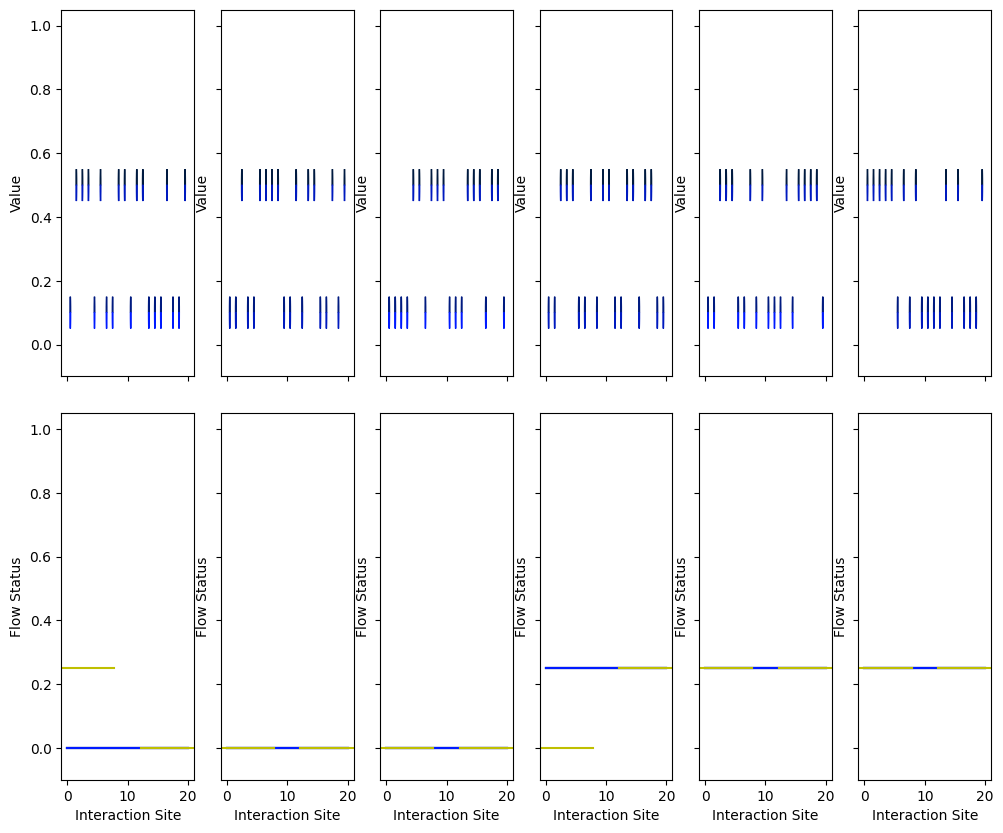

In [9]:
from counterfusion import *
import numpy as np
import matplotlib.pyplot as plt

# Define a six-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C5--M5--C6--M6--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 0
# Number of backward-moving edge states: 4 (#0,#1,#2,#3)
#===============================================================
# General information for the system - Hyperparameters
totalNumMover = 4
numForwardMover = 0
zeroVoltTerminal = 3
#===============================================================
# Information of scattering events 
# Interaction parameters
v02 = 0.5
v13 = 0.1
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,2,v02,10],[1,3,v13,10]]
# C2--M2--C3
edgeDef2 = [[0,2,v02,10],[1,2,v13,10]]
# C3--M3--C4
edgeDef3 = [[0,2,v02,10],[1,3,v13,10]]
# C4--M4--C5
edgeDef4 = [[0,2,v02,10],[1,2,v13,10]]
# C5--M5--C6
edgeDef5 = [[0,2,v02,10],[1,3,v13,10]]
# C6--M6--C1
edgeDef6 = [[0,2,v02,10],[1,2,v13,10]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))

print("The transition matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,0,-1,0,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build non-interacting counter-propagating edge states 

The transformation matrix between C1 and C2:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Corresponding matrix for this system:
[[ 4. -2.  0.  0.  0. -2.]
 [-2.  4. -2.  0.  0.  0.]
 [ 0. -2.  4. -2.  0.  0.]
 [ 0.  0. -2.  4. -2.  0.]
 [ 0.  0.  0. -2.  4. -2.]
 [-2.  0.  0.  0. -2.  4.]]
Its determinant is 0.0
Its solutions for all terminal voltages:
[0.75 0.5  0.25 0.   0.25 0.5 ]


C:\gitproj\Counterfusion\allscatter.py:48: UserWarning: Your matrix is singular. `np.linalg.lstsq` is used to find an approximate solution.
  warnings.warn("Your matrix is singular. `np.linalg.lstsq` is used to find an approximate solution.")


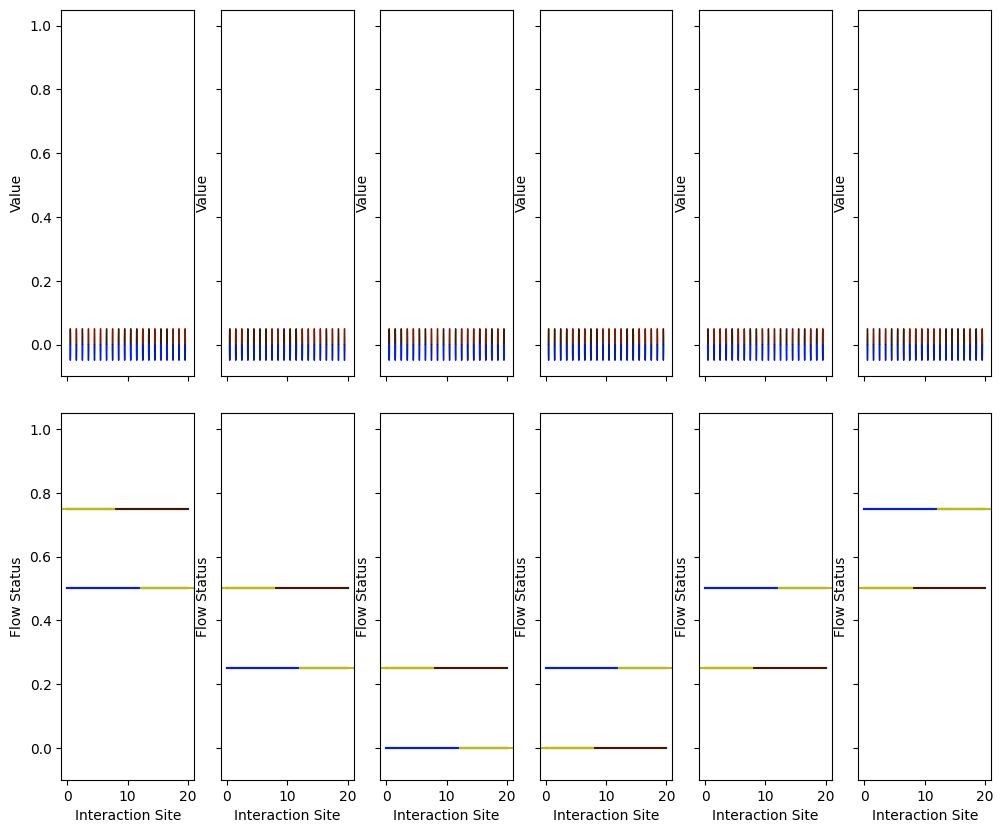

In [4]:
from counterfusion import *
import numpy as np
import matplotlib.pyplot as plt

# Define a six-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C5--M5--C6--M6--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 2 (#2,#3)
#===============================================================
# General information for the system - Hyperparameters
totalNumMover = 4
numForwardMover = 2
zeroVoltTerminal = 3
#===============================================================
# Information of scattering events 
# Interaction parameters
v02 = 0
v13 = 0
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,2,v02,10],[1,3,v13,10]]
# C2--M2--C3
edgeDef2 = [[0,2,v02,10],[1,2,v13,10]]
# C3--M3--C4
edgeDef3 = [[0,2,v02,10],[1,3,v13,10]]
# C4--M4--C5
edgeDef4 = [[0,2,v02,10],[1,2,v13,10]]
# C5--M5--C6
edgeDef5 = [[0,2,v02,10],[1,3,v13,10]]
# C6--M6--C1
edgeDef6 = [[0,2,v02,10],[1,2,v13,10]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))

print("The transition matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,0,-1,0,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build interacting counter-propagating edge states 

The transformation matrix between C1 and C2:
[[0.10891089 0.         0.89108911 0.        ]
 [0.         0.15662651 0.         0.84337349]
 [0.89108911 0.         0.10891089 0.        ]
 [0.         0.84337349 0.         0.15662651]]
Corresponding matrix for this system:
[[ 1.28728697 -0.2655374   0.          0.          0.         -1.02174957]
 [-0.2655374   1.27884077 -1.01330337  0.          0.          0.        ]
 [ 0.         -1.01330337  1.27884077 -0.2655374   0.          0.        ]
 [ 0.          0.         -0.2655374   1.27726277 -1.01172537  0.        ]
 [ 0.          0.          0.         -1.01172537  1.27726277 -0.2655374 ]
 [-1.02174957  0.          0.          0.         -0.2655374   1.28728697]]
Its determinant is -9.30949365915372e-16
Its solutions for all terminal voltages:
[3.42683522 1.91191143 1.51492378 0.         0.59080369 2.84182779]


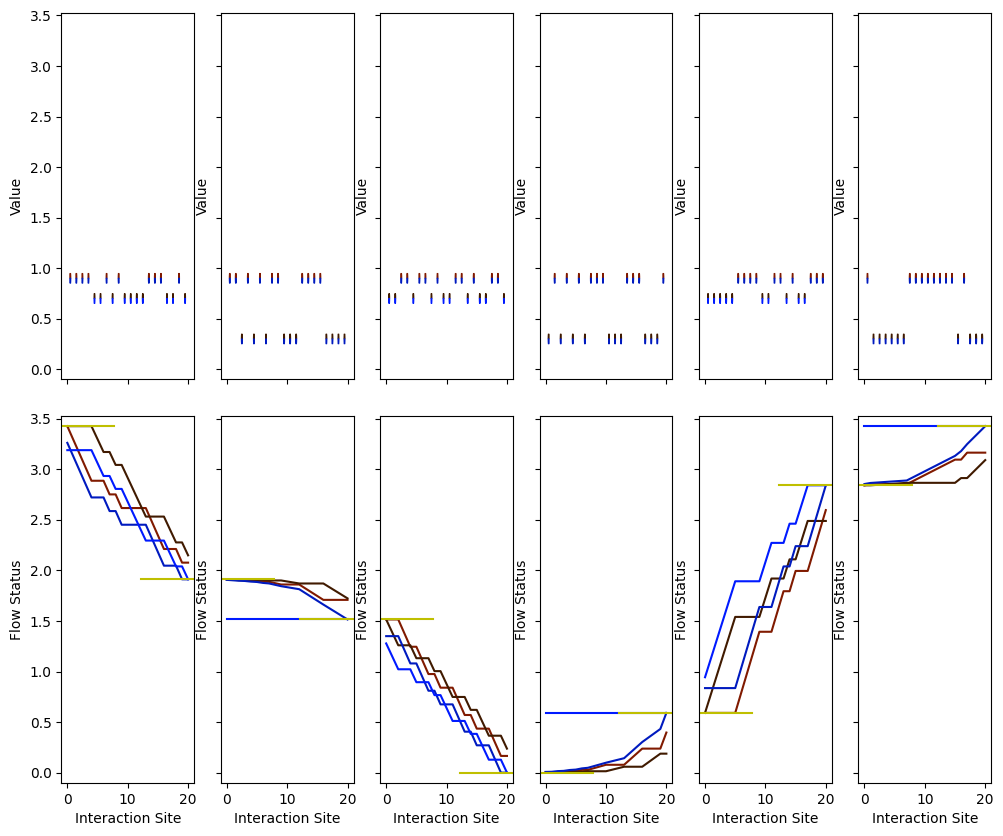

In [3]:
from counterfusion import *
import numpy as np
import matplotlib.pyplot as plt

# Define a six-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C5--M5--C6--M6--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 2 (#2,#3)
#===============================================================
# General information for the system - Hyperparameters
totalNumMover = 4
numForwardMover = 2
zeroVoltTerminal = 3
#===============================================================
# Information of scattering events 
# Interaction parameters
v02 = 0.9
v13 = 0.7
v12 = 0.3
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,2,v02,10],[1,3,v13,10]]
# C2--M2--C3
edgeDef2 = [[0,2,v02,10],[1,2,v12,10]]
# C3--M3--C4
edgeDef3 = [[0,2,v02,10],[1,3,v13,10]]
# C4--M4--C5
edgeDef4 = [[0,2,v02,10],[1,2,v12,10]]
# C5--M5--C6
edgeDef5 = [[0,2,v02,10],[1,3,v13,10]]
# C6--M6--C1
edgeDef6 = [[0,2,v02,10],[1,2,v12,10]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))

print("The transition matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,0,-1,0,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build a crossbar structure

The transformation matrix between C1 and C2:
[[0.25556083 0.27022906 0.47421011]
 [0.33578918 0.35506223 0.30914859]
 [0.40864999 0.37470871 0.2166413 ]]
Corresponding matrix for this system:
[[ 1.24912742 -0.2166413   0.         -1.03248612]
 [-1.2166413   1.24886465 -0.03222335  0.        ]
 [ 0.         -1.03222335  1.24920508 -0.21698173]
 [-0.03248612  0.         -1.21698173  1.24946784]]
Its determinant is 4.295595473660181e-15
Its solutions for all terminal voltages:
[0.98889342 0.96337788 0.         0.02571119]


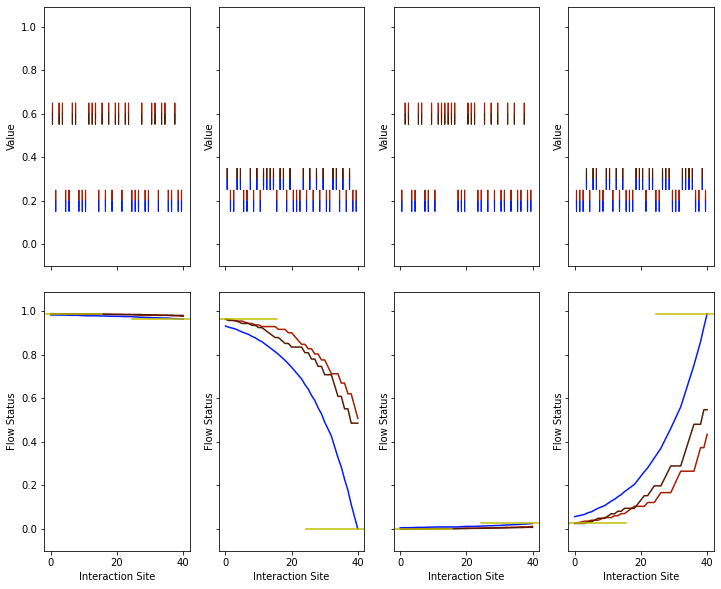

In [11]:
from counterfusion import *
import numpy as np
import matplotlib.pyplot as plt

# Define a four-terminal system
# C1--M1--C2--M2--C3--M3--C4--M4--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 2 (#2,#3)
#===============================================================
# General information for the system - Hyperparameters
totalNumMover = 3
numForwardMover = 2
zeroVoltTerminal = 2
#===============================================================
# Information of scattering events 
# Interaction parameters
v02 = 0.2
v12 = 0.3
v01 = 0.6

numperEdge = 20
# Define interaction between nodes (contacts)
# C1--M1--C2
edgeDef1 = [[0,2,v02,numperEdge],[0,1,v01,numperEdge]]
# C2--M2--C3
edgeDef2 = [[0,2,v02,numperEdge],[1,2,v12,numperEdge]]
# C3--M3--C4
edgeDef3 = [[0,2,v02,numperEdge],[0,1,v01,numperEdge]]
# C4--M4--C1
edgeDef4 = [[0,2,v02,numperEdge],[1,2,v12,numperEdge]]
#================================================================
edgesDef = [edgeDef1,edgeDef2,edgeDef3,edgeDef4]
edgesInfo = []
for edgeDef in edgesDef:
    edgesInfo.append(generate_bynumber(edgeDef))

graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))    

print("The transition matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,-1,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
print(sys.mastermat())
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
axs=sys.plot()

#### Build a crossbar structure with a split-gate design

The transformation matrix between C1 and C2:
[[0.1556492  0.35692066 0.48743015 0.        ]
 [0.15900941 0.36485458 0.47613601 0.        ]
 [0.68534139 0.27822477 0.03643384 0.        ]
 [0.         0.         0.         1.        ]]
Corresponding matrix for this system:
[[ 2.06747148e+00 -1.03526026e+00 -2.25811619e-01 -8.06399597e-01]
 [-9.22697058e-01  1.29390760e+00 -9.48739811e-02 -2.76336565e-01]
 [-1.13736782e-01 -2.57473765e-01  1.12968808e+00 -7.58477537e-01]
 [-1.03103764e+00 -1.17357827e-03 -8.09002483e-01  1.84121370e+00]]
Its determinant is 2.4251131798154143e-15
Its solutions for all terminal voltages:
[1.32749664 1.10555938 0.         0.74407249]
Information for blocking states
State # [0] is blocked from terminal(s) # 1
State # [2] is blocked from terminal(s) # 0
State # [3] is blocked from terminal(s) # 2
State # [1] is blocked from terminal(s) # 3
json.dump
Data written to data_4term.json


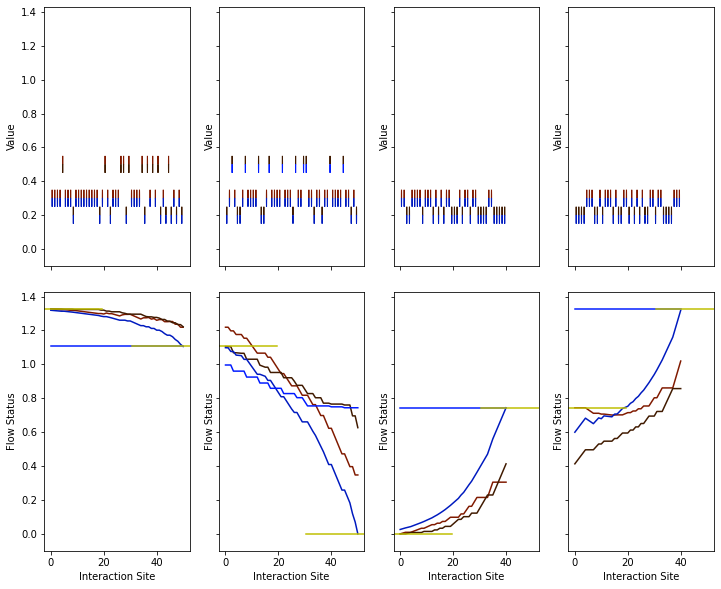

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from counterfusion import *
# Define a four-terminal system comprising regions with different doping levels 
# (two or more top gates) Here we assume the system looks like:
# C1--M1--M2--C2--M3--M4--C3--M5--C4--M6--C1
# Total number of edge states: 3
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 1 (#2)
# In a differently doped region surrounding contact 2 (C2), only #0,#2 exist
#===============================================================
# General information for the system - Hyperparameters
totalNumMover = 4
numForwardMover = 2
zeroVoltTerminal = 2
#===============================================================
# Information of scattering events 
# Interaction parameters
beta = 0.3
delta = 0.2
blockStates = [[1,[0]],[0,[2]],[2,[3]],[3,[1]]]
# The definition of blocking_state should strictly follow this rule: 
# [[index_of_terminal#1,[all blocked states in this terminal]],[[index_of_terminal#2,[all blocked states in this terminal],...]]]
#===============================================================
# Information for scattering events
numperEdge = 10
edgeDef1 = [[0,2,beta,numperEdge],[1,2,delta,numperEdge],[0,1,0.5,numperEdge]]
edgeDef2 = [[0,2,beta,numperEdge*2]] # #1 edge state does not exist here
edgeDef3 = [[0,2,beta,numperEdge*2]] # #1 edge state does not exist here
edgeDef4 = [[0,2,beta,numperEdge],[1,2,delta,numperEdge],[1,3,0.5,numperEdge]]
edgeDef5 = [[0,2,beta,numperEdge*2],[1,2,delta,numperEdge*2]]
edgeDef6 = [[0,2,beta,numperEdge*2],[1,2,delta,numperEdge*2]]
#================================================================
edgeDefs = [edgeDef1+edgeDef2,edgeDef3+edgeDef4,edgeDef5,edgeDef6]
edgesInfo = []
for edgeDef in edgeDefs:
    edgesInfo.append(generate_bynumber(edgeDef))


graph = []
for edgeInfo in edgesInfo:
    graph.append(Edge(edgeInfo,totalNumMover,numForwardMover))    

print("The transition matrix between C1 and C2:")
print(graph[0].trans_mat())
print("===========================================================")   
nodesCurrent = [1,0,-1,0]
sys = System(nodesCurrent,graph,numForwardMover,zeroVoltTerminal,blockStates)
#================================================================
# Your system has been defined, let us make some fun out of it.
print("Corresponding matrix for this system:")
M = sys.mastermat()
print(M)
print("Its determinant is", np.linalg.det(sys.mastermat()))
print("===========================================================")
print("Its solutions for all terminal voltages:")
print(sys.solve())
print("===========================================================")
print("Information for blocking states")
[print("State(s) #",info[1],"is blocked from terminal #", info[0]) for info in blockStates]
axs=sys.plot()
sys.output_to_json('data_4term.json')

# How to analyze the system?

#### Do not want randomness?

In [27]:
# if you want the same sequence (without randomized order) but with different values
edgeDef = [[0,2,beta*0.95,10],[2,1,beta*0.95,10]]
seq_copy = generate_bynumber(edgeDef)
print("Original sequence (First 10 elements to display):\n")
print(seq_copy[:10])
print("======================================================")
print("Modified sequence (First 10 elements to display):\n")
seq_copy[:,2] = 0.1
print(seq_copy[:10])

Original sequence (First 10 elements to display):

[[2.   1.   0.95]
 [0.   2.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [2.   1.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [2.   1.   0.95]]
Modified sequence (First 10 elements to display):

[[2.  1.  0.1]
 [0.  2.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [2.  1.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [2.  1.  0.1]]
